In [1]:
import numpy as np
import qiskit
import qutip
from qiskit import QuantumCircuit,execute, transpile, Aer, IBMQ,ClassicalRegister, QuantumRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library.standard_gates import *
import matplotlib.pyplot as plt
from qiskit_symb.quantum_info import Statevector
from qiskit_symb.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit.circuit import Parameter, ParameterVector
import random

In [4]:
#Derivación operación ctrl_x
sigma_x = [[0,1],[1,0]]
aux_qc = QuantumCircuit(1, name = "sigma_x")
aux_qc.unitary(sigma_x,0)
ctrl_x = aux_qc.to_gate().control(num_ctrl_qubits = 2,ctrl_state = '00')

#Derivación operación ctrl_y
sigma_y = [[0,-1j],[1j,0]]
aux_qc2 = QuantumCircuit(1, name = "sigma_y")
aux_qc2.unitary(sigma_y,0)
ctrl_y = aux_qc2.to_gate().control(num_ctrl_qubits = 2,ctrl_state = '10')

#Derivación operación ctrl_z
sigma_z = [[1j,0],[0,-1j]]
aux_qc3 = QuantumCircuit(1, name = "sigma_z")
aux_qc3.unitary(sigma_z,0)
ctrl_z = aux_qc3.to_gate().control(num_ctrl_qubits = 2,ctrl_state = '01')


In [5]:
a = b = c = 1
theta1 = np.pi/5
theta2 = np.pi/6
theta3 = np.pi/4
ae = Aer.get_backend("qasm_simulator")
z = []
y = []
x = []
ae = Aer.get_backend("qasm_simulator")
phi = np.linspace(0,2*np.pi,1000)
def estado_inicial(q,a,b,c,theta1,theta2,theta3):
    q.u(a,b,c,2)
    q.ry(-2*theta1,0)
    q.barrier()
    q.x(0)
    q.cry(-2*theta2,0,1)
    q.x(0)
    q.barrier()
    q.cry(-2*theta3,0,1)

def circuito_final_z(q,a,b,c,theta1,theta2,theta3):
    estado_inicial(q,a,b,c,theta1,theta2,theta3)
    q.barrier()
    q.append(ctrl_x,[0,1,2])
    q.append(ctrl_y,[0,1,2])
    q.append(ctrl_z,[0,1,2])
    q.barrier()
    q.measure(2,2)

def circuito_final_x(q,a,b,c,theta1,theta2,theta3):
    estado_inicial(q,a,b,c,theta1,theta2,theta3)
    q.barrier()
    q.append(ctrl_x,[0,1,2])
    q.append(ctrl_y,[0,1,2])
    q.append(ctrl_z,[0,1,2])
    q.barrier()
    q.h(2)
    q.measure(2,2)
    
def circuito_final_y(q,a,b,c,theta1,theta2,theta3):
    estado_inicial(q,a,b,c,theta1,theta2,theta3)
    q.barrier()
    q.append(ctrl_x,[0,1,2])
    q.append(ctrl_y,[0,1,2])
    q.append(ctrl_z,[0,1,2])
    q.barrier()
    q.sdg(2)
    q.h(2)
    q.measure(2,2)

def medicion(N0,N1,N,a):
    med = (N0/N) - (N1/N)
    a.append(med)

def medicion_y(N0,N1,N,a):
    med = (N1/N) - (N0/N)
    a.append(med)

In [10]:
for i in range(1000):
    a = random.choice(list(phi))
    b = random.choice(list(phi))
    c = random.choice(list(phi))
    qc_z = QuantumCircuit(3,3)
    qc_x = QuantumCircuit(3,3)
    qc_y = QuantumCircuit(3,3)
    circuito_final_x(qc_x,a,b,c,theta1,theta2,theta3)
    circuito_final_y(qc_y,a,b,c,theta1,theta2,theta3)
    circuito_final_z(qc_z,a,b,c,theta1,theta2,theta3)
    
    #medición x,y,z
    results_x = execute(qc_x,backend = ae,shots = 600).result()
    results_y = execute(qc_y,backend = ae,shots = 600).result()
    results_z = execute(qc_z,backend = ae,shots = 600).result()
    
    ###obtención de datos en x,y,z###
    count_x = results_x.get_counts()
    count_y = results_y.get_counts()
    count_z = results_z.get_counts()
    
     # medición en x #
    keys_x = list(count_x.keys())
    
    try:
        aux = keys_x[1]
        
        if (keys_x[0] in ['100','000'] and keys_x[1] in ['100','000']):

            if (keys_x[0] == '100'):
                N1_x = count_x[keys_x[0]]
                N0_x = count_x[keys_x[1]]

            elif (keys_x[1] == '100'):
                N1_x = count_x[keys_x[1]]
                N0_x = count_x[keys_x[0]]

            elif (keys_x[0] == '000'):
                N0_x = count_x[keys_x[0]]
                N1_x = count_x[keys_x[1]]

            elif (keys_x[1] == '000'):
                N0_x = count_x[keys_x[1]]
                N1_x = count_x[keys_x[0]]

        else:
            print("error en la secuencia x, verificar la secuencia")
            count_x
            break
    except:
        
        if (keys_x[0] in ['100','000']):
            
            if (keys_x[0] == '100'):
                N1_x = count_x[keys_x[0]]
                N0_x = 0
            
            elif (keys_x[0] == '000'):
                N0_x = count_x[keys_x[0]]
                N1_x = 0
        else:
            print("error en la secuencia x, verificar la secuencia")
            count_x
            break
                
    medicion(N0_x,N1_x,600,x)
    
    #medición en y 
    
    keys_y = list(count_y.keys())
        
    try:
        aux = keys_y[1]
        
        if (keys_y[0] in ['100','000'] and keys_y[1] in ['100','000']):

            if (keys_y[0] == '100'):
                N1_y = count_y[keys_y[0]]
                N0_y = count_y[keys_y[1]]

            elif (keys_y[1] == '100'):
                N1_y = count_y[keys_y[1]]
                N0_y = count_y[keys_y[0]]

            elif (keys_y[0] == '000'):
                N0_y = count_y[keys_y[0]]
                N1_y = count_y[keys_y[1]]

            elif (keys_y[1] == '000'):
                N0_y = count_y[keys_y[1]]
                N1_y = count_y[keys_y[0]]

        else:
            print("error en la secuencia y, verificar la secuencia")
            count_y
            break
    except:
        
        if (keys_y[0] in ['100','000']):
            
            if (keys_y[0] == '100'):
                N1_y = count_y[keys_y[0]]
                N0_y = 0
            
            elif (keys_y[0] == '000'):
                N0_y = count_y[keys_y[0]]
                N1_y = 0
        else:
            print("error en la secuencia y, verificar la secuencia")
            count_y
            break
                
    medicion_y(N0_y,N1_y,600,y)
    
    #medición en z
    
    keys_z = list(count_z.keys())
    
    try:
        aux = keys_z[1]
        
        if (keys_z[0] in ['100','000'] and keys_z[1] in ['100','000']):

            if (keys_z[0] == '100'):
                N1_z = count_z[keys_z[0]]
                N0_z = count_z[keys_z[1]]

            elif (keys_z[1] == '100'):
                N1_z = count_z[keys_z[1]]
                N0_z = count_z[keys_z[0]]

            elif (keys_z[0] == '000'):
                N0_z = count_z[keys_z[0]]
                N1_z = count_z[keys_z[1]]

            elif (keys_z[1] == '000'):
                N0_z = count_z[keys_z[1]]
                N1_z = count_z[keys_z[0]]

        else:
            print("error en la secuencia y, verificar la secuencia")
            count_z
            break
    except:
        
        if (keys_z[0] in ['100','000']):
            
            if (keys_z[0] == '100'):
                N1_z = count_z[keys_z[0]]
                N0_z = 0
            
            elif (keys_z[0] == '000'):
                N0_z = count_z[keys_z[0]]
                N1_z = 0
        else:
            print("error en la secuencia y, verificar la secuencia")
            count_z
            break
                
    medicion(N0_z,N1_z,600,z)
    
    #limpieza de circuitos
    qc_z.clear()
    qc_x.clear()
    qc_y.clear()

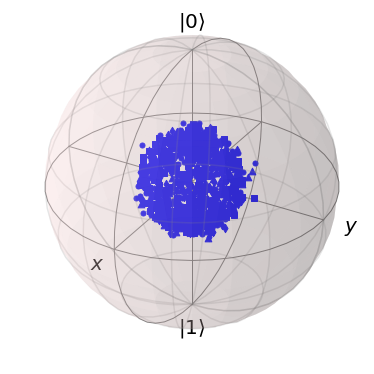

In [11]:
bloch = qutip.Bloch()
for k in range(len(x)):
    bloch.add_points([x[k],y[k],z[k]],'b')
    
bloch.show()

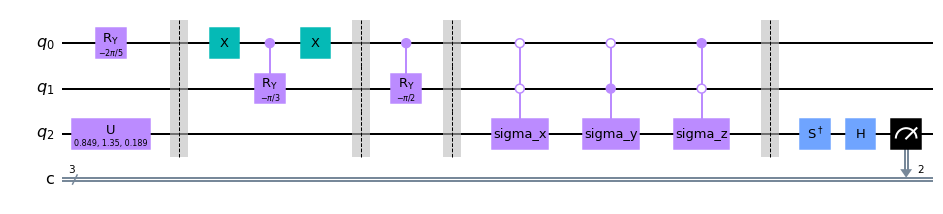

In [9]:
qc_y.draw("mpl")